In [1]:
# get_ipython().magic(u'config IPCompleter.greedy=True')

In [1]:
import requests
import configparser
import json
import pandas as pd
from datetime import date, timedelta
from ocs_sample_library_preview import *

In [2]:
config = configparser.ConfigParser()
config.read('config.ini')

ocsClient = OCSClient(config.get('Access', 'ApiVersion'), config.get('Access', 'Tenant'), config.get('Access', 'Resource'), 
                        config.get('Credentials', 'ClientId'), config.get('Credentials', 'ClientSecret'))

namespaceId = config.get('Configurations', 'Namespace')
namespaceId

'Production'

In [3]:
#dateFrom = '2020-01-12'
#dateTo ='2020-01-23'
dateFrom = 'Mar 11, 2020, 12:00:00 AM' #str(date.today()-timedelta(days=10))
dateTo = 'Mar 12, 2020, 12:00:00 AM'# str(date.today()) #10 days of data
timeinterval = '00:01:00' #interpolate every minute

#dataviewId = Wind Turbine Data_NN, where NN is your specific student number (e.g. NN=01 in this example)
dataviewId= "Wind Turbine Data"

data, n, f = ocsClient.DataViews.getDataInterpolated(namespaceId, dataviewId, startIndex=dateFrom, endIndex=dateTo, 
                                                         interval=timeinterval, count=150000)
data



-11T15:36:00Z',
  'Turbine': 'GE01',
  'Blade1 Actual': 82.70337,
  'Blade2 Actual': 82.68756,
  'Blade3 Actual': 82.67594,
  'Rotor Speed': 0.40319946,
  'State': 11,
  'Active Power': -4.4914007,
  'Nacelle Position': 326.2895,
  'Air Temperature': 58.762318,
  'Wind Speed': 0.44435373},
 {'Timestamp': '2020-03-11T15:37:00Z',
  'Turbine': 'GE01',
  'Blade1 Actual': 82.69541,
  'Blade2 Actual': 82.67949,
  'Blade3 Actual': 82.66764,
  'Rotor Speed': 0.40298352,
  'State': 11,
  'Active Power': -4.485436,
  'Nacelle Position': 326.2388,
  'Air Temperature': 58.750637,
  'Wind Speed': 0.4393609},
 {'Timestamp': '2020-03-11T15:38:00Z',
  'Turbine': 'GE01',
  'Blade1 Actual': 82.687454,
  'Blade2 Actual': 82.67142,
  'Blade3 Actual': 82.65935,
  'Rotor Speed': 0.40276757,
  'State': 11,
  'Active Power': -4.479471,
  'Nacelle Position': 326.1881,
  'Air Temperature': 58.738956,
  'Wind Speed': 0.434368},
 {'Timestamp': '2020-03-11T15:39:00Z',
  'Turbine': 'GE01',
  'Blade1 Actual': 82.679

In [4]:
df = pd.DataFrame(data)
df["Timestamp"] = pd.to_datetime(df["Timestamp"])
df

,Timestamp,Turbine,Blade1 Actual,Blade2 Actual,Blade3 Actual,Rotor Speed,State,Active Power,Nacelle Position,Air Temperature,Wind Speed
0,2020-03-11 00:00:00+00:00,GE01,-0.543748,-0.508561,-0.111478,15.482932,16,393.81445,304.80900,57.547790,6.947662
1,2020-03-11 00:01:00+00:00,GE01,-0.541356,-0.506288,-0.098839,14.812955,16,405.43518,304.64220,57.531895,6.636685
2,2020-03-11 00:02:00+00:00,GE01,-0.538963,-0.504015,-0.086199,13.750278,16,307.92307,304.47540,57.516000,6.979335
3,2020-03-11 00:03:00+00:00,GE01,-0.536571,-0.501742,-0.073560,17.696032,16,618.70000,304.30860,57.500107,7.525977
4,2020-03-11 00:04:00+00:00,GE01,-0.534179,-0.499470,-0.060921,17.967062,16,641.00000,304.21494,57.484210,8.931692
...,...,...,...,...,...,...,...,...,...,...,...
14405,2020-03-11 23:56:00+00:00,GE10,0.233293,0.169606,0.251599,15.938308,16,401.50000,228.20998,65.688484,7.456245
14406,2020-03-11 23:57:00+00:00,GE10,0.240908,0.177822,0.258947,15.429196,16,448.58334,228.23964,65.724090,8.050763
14407,2020-03-11 23:58:00+00:00,GE10,0.248524,0.186039,0.266295,13.958876,16,276.98816,228.26932,65.759700,6.243790
14408,2020-03-11 23:59:00+00:00,GE10,0.256139,0.194255,0.273643,12.944016,16,222.51347,228.29898,65.795300,6.711619


In [5]:
import matplotlib.pyplot as plt
import numpy as np

In [6]:
#Renaming DataFrame column names to abbreviations, in order to display these column names clearly in a correlation plot 

df.rename(columns = {'Blade1 Actual':'BL1', 'Blade2 Actual':'BL2', 
                     'Blade3 Actual':'BL3', 'Rotor Speed':'RS','Turbine':'TS', 
                     'Active Power':'AP', 'Nacelle Position':'NP', 'Air Temperature':'AT',
                     'Wind Speed':'WS'}, inplace = True)

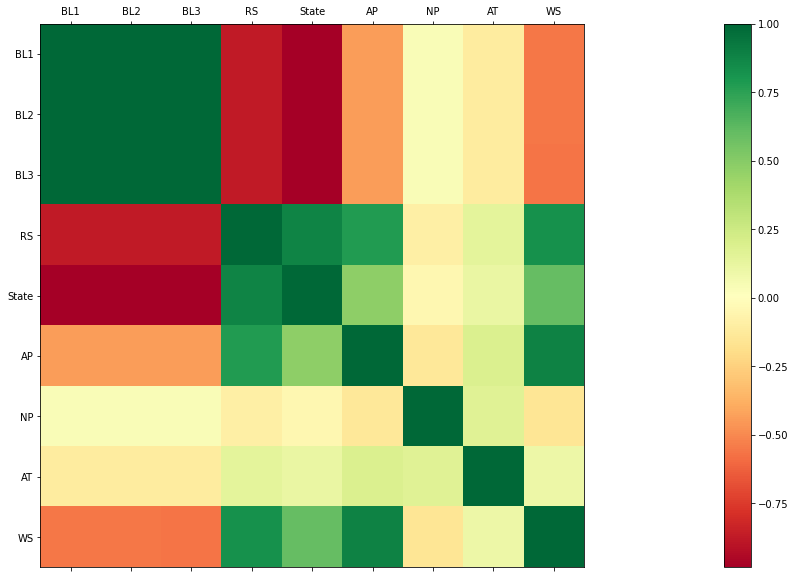

In [35]:
#Check the correlation between Active Power and the rest of the variables

#retrieve the correlation table
df_corr = df.corr()

#increase the size of the figure
fig = plt.figure(figsize=(50,10))
ax = fig.add_subplot(111)

#set the color pallete (Red, yellow, green)
cax = ax.matshow(df_corr, cmap=plt.cm.RdYlGn)
fig.colorbar(cax)

#configure the labels
labels = [c for c in df_corr.columns]

#make sure to show all the labels
ax.set_xticks(np.arange(len(labels)))
ax.set_yticks(np.arange(len(labels)))

#Setting labels for the x and y axes of the correlation plot
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)

plt.show(block=False)

In [7]:
#Renaming DataFrame column names from abbreviations back to their original full names

df.rename(columns = {'BL1':'Blade1', 'BL2':'Blade2', 
                     'BL3':'Blade3', 'RS':'Rotor Speed Value','TS':'Turbine', 
                     'AP':'Active Power Value','NP':'Nacelle Position Value', 'AT':'Air Temperature Value',
                     'WS':'Wind Speed Value'}, inplace = True)

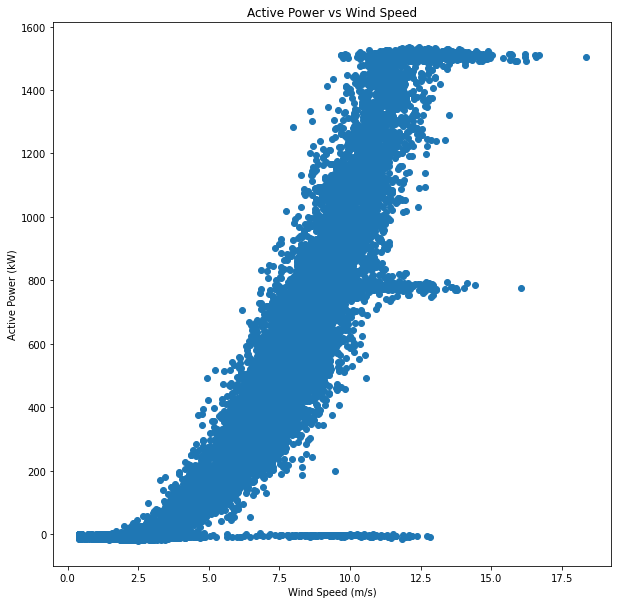

In [8]:
#Plotting Active Power versus Wind Speed

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.scatter(df['Wind Speed Value'], df['Active Power Value'])
ax.set_xlabel('Wind Speed (m/s)')
ax.set_ylabel('Active Power (kW)')
ax.set_title('Active Power vs Wind Speed')

plt.show(block=False)

In [9]:
# df = df.dropna()

In [10]:

# df = df.dropna() #not needed
#Remove the GE05 turbine rows from the data frame because it has a lower rating relative to all the other turbines
filterOutGE05 = df['Turbine'] != "GE05"
df_Filter = df[filterOutGE05]

In [11]:
#Filter out negative & excessive Active Power Values
filterNegativeActivePower = (df_Filter['Active Power Value'] >= 0) 
df_Filter = df_Filter[filterNegativeActivePower]

In [12]:
#Remove the rows where we have a high wind speed and low active power in order to keep only the normal operating conditions
filterOutLowPowerHighWindSpeedData = (~((df_Filter['Wind Speed Value'] >  10) & (df_Filter['Active Power Value'] <600)))
df_Filter = df_Filter[filterOutLowPowerHighWindSpeedData]

In [13]:
#Keep only the rows which correspond to the "Load Operation" state
filterLoadOperationState = df_Filter['State'] == 16
df_Filter = df_Filter[filterLoadOperationState]

In [14]:
#Filter out high Wind Speeds (> 13 m/s) that do not change the Active Power results
filterOutHighWind = df_Filter['Wind Speed Value'] <13
df_Filter = df_Filter[filterOutHighWind]

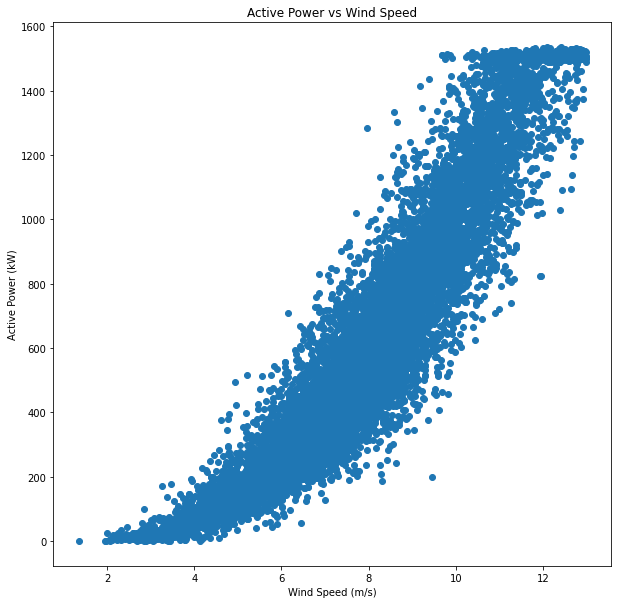

In [15]:
#Plotting Active Power versus Wind Speed - filtered data frame representing Normal Operating Conditions

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.scatter(df_Filter['Wind Speed Value'], df_Filter['Active Power Value'])
ax.set_xlabel('Wind Speed (m/s)')
ax.set_ylabel('Active Power (kW)')
ax.set_title('Active Power vs Wind Speed')

plt.show(block=False)

In [16]:
#Prepare the training & testing/scoring data sets, and split them randomly
from sklearn.model_selection import train_test_split
#define the target variable to be predicted
y = df_Filter['Active Power Value'].values
#split the dataset randomly into test and train sets
X_train, X_test, y_train, y_test = train_test_split(df_Filter[['Air Temperature Value', 'Wind Speed Value']].values, 
                                                    y, test_size=0.25, random_state=42)

In [17]:
#Use the Decision Tree Regression Machine Learning model from scikit-learn
from sklearn.tree import DecisionTreeRegressor
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X_train, y_train)
regr_2.fit(X_train, y_train)

# Predict
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

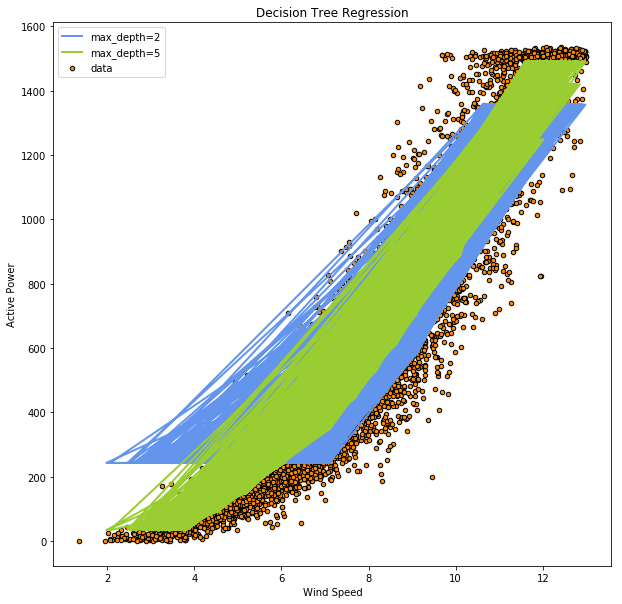

In [20]:
# Plot the results
plt.figure(figsize=(10,10))
plt.scatter(X_train[:,1], y_train, s=20, edgecolor="black", c="darkorange", label="data")
plt.plot(X_test[:,1], y_1, color="cornflowerblue",label="max_depth=2", linewidth=2)
plt.plot(X_test[:,1], y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("Wind Speed")
plt.ylabel("Active Power")
plt.title("Decision Tree Regression")
plt.legend()
plt.show(block=False)

In [18]:
#save the machine learning model to disk
import pickle
filename = 'WT_ActivePower_model.sav'
pickle.dump(regr_2, open(filename, 'wb'))

In [19]:
#Test the model with the scoring/testing data set
loaded_model = pickle.load(open(filename, 'rb'))
global result
result = loaded_model.score(X_test, y_test)
#print the model score
print(result)

0.9087426525813225


In [20]:
#Sample prediction
# define input
new_input = [[45, 6.6]] #Temp=45 F, Wind Speed = 6.6 m/s
# get prediction for new input
new_output = regr_2.predict(new_input)
print(new_output)

[348.57358041]


In [21]:
#Call the OpenWeather API to retrieve the forecasted air temperature and wind speed for Amarillo, TX for the next 5 days
import requests
url="https://api.openweathermap.org/data/2.5/forecast?q=Amarillo,US&APPID=5dac981ce33f41f61d8d1ea06ee89798"
responseWeatherForecast=requests.get(url)

In [22]:
responseWeatherForecast.json()

level': 880,
    'humidity': 80,
    'temp_kf': -0.37},
   'weather': [{'id': 803,
     'main': 'Clouds',
     'description': 'broken clouds',
     'icon': '04d'}],
   'clouds': {'all': 52},
   'wind': {'speed': 7.61, 'deg': 220},
   'visibility': 10000,
   'pop': 0,
   'sys': {'pod': 'd'},
   'dt_txt': '2020-11-24 15:00:00'},
  {'dt': 1606240800,
   'main': {'temp': 289.89,
    'feels_like': 280.48,
    'temp_min': 289.89,
    'temp_max': 291.2,
    'pressure': 1003,
    'sea_level': 1003,
    'grnd_level': 880,
    'humidity': 45,
    'temp_kf': -1.31},
   'weather': [{'id': 802,
     'main': 'Clouds',
     'description': 'scattered clouds',
     'icon': '03d'}],
   'clouds': {'all': 27},
   'wind': {'speed': 11.77, 'deg': 246},
   'visibility': 10000,
   'pop': 0,
   'sys': {'pod': 'd'},
   'dt_txt': '2020-11-24 18:00:00'},
  {'dt': 1606251600,
   'main': {'temp': 290.11,
    'feels_like': 279.72,
    'temp_min': 290.11,
    'temp_max': 290.45,
    'pressure': 1002,
    'sea_level':

In [23]:
#Store the forecasted air temperature, wind speed and timestamp from the API json response in a pandas DataFrame

from decimal import Decimal
import datetime
TempArray = []
WindSpeedArray = []
TimestampArray = []

for val in responseWeatherForecast.json()["list"]:
    tempKelvin = val["main"]["temp"]
    tempF = round(((tempKelvin - 273.15) * (9/5)) + 32, 2)
    windSpeedMeterPerSec = round(val["wind"]["speed"], 2)
    np.array(TempArray.append(tempF))
    np.array(WindSpeedArray.append(windSpeedMeterPerSec))
    np.array(TimestampArray.append(datetime.datetime.strptime(val["dt_txt"], '%Y-%m-%d %H:%M:%S')))   
          
dfWeatherForecast = pd.DataFrame({'Timestamp':TimestampArray, 'Temp (F)':TempArray, 'Wind Speed (m/s)':WindSpeedArray})        
                              
dfWeatherForecast

,Timestamp,Temp (F),Wind Speed (m/s)
0,2020-11-24 15:00:00,54.23,7.61
1,2020-11-24 18:00:00,62.13,11.77
2,2020-11-24 21:00:00,62.53,11.95
3,2020-11-25 00:00:00,45.27,11.08
4,2020-11-25 03:00:00,40.12,9.88
5,2020-11-25 06:00:00,38.50,5.14
6,2020-11-25 09:00:00,37.71,4.76
7,2020-11-25 12:00:00,36.28,4.17
8,2020-11-25 15:00:00,41.27,2.78
9,2020-11-25 18:00:00,53.20,4.23


In [24]:
#Use the machine learning model developed previously to predict the Active Power and add the values to the existing Data Frame

import pickle
filename = 'WT_ActivePower_model.sav'
loaded_model = pickle.load(open(filename, 'rb'))

PredictedPowerArray=[]  

for index, row in dfWeatherForecast.iterrows():
    new_input = [[row['Temp (F)'], row['Wind Speed (m/s)']]]
    result = loaded_model.predict(new_input)
    np.array(PredictedPowerArray.append(result))
    
dfWeatherForecast['Predicted Active Power (kW)']=pd.DataFrame(PredictedPowerArray)

dfWeatherForecast

,Timestamp,Temp (F),Wind Speed (m/s),Predicted Active Power (kW)
0,2020-11-24 15:00:00,54.23,7.61,445.740888
1,2020-11-24 18:00:00,62.13,11.77,1490.622023
2,2020-11-24 21:00:00,62.53,11.95,1490.622023
3,2020-11-25 00:00:00,45.27,11.08,1157.667784
4,2020-11-25 03:00:00,40.12,9.88,888.910270
5,2020-11-25 06:00:00,38.50,5.14,148.488162
6,2020-11-25 09:00:00,37.71,4.76,148.488162
7,2020-11-25 12:00:00,36.28,4.17,92.285506
8,2020-11-25 15:00:00,41.27,2.78,34.123415
9,2020-11-25 18:00:00,53.20,4.23,92.285506


### Create a stream in OCS to hold the prediction value

In [42]:
#Create the type for air temp, wind speed, predicted active power, and time

typeId = "Wind_Turbine_Predictions_Time"

typeTempWindPowerTime = SdsType(
    id=typeId,
    description="A Time-Series indexed type with 3 values",
    sdsTypeCode=SdsTypeCode.Object)

#This type uses two data types, double and datetime
doubleType = SdsType()
doubleType.Id = "doubleType"
doubleType.SdsTypeCode = SdsTypeCode.Double

timeType = SdsType()
timeType.Id = "string"
timeType.SdsTypeCode = SdsTypeCode.DateTime

#This type has three double properties and one datetime
airTempProp = SdsTypeProperty()
airTempProp.Id = "Air_Temperature"
airTempProp.SdsType = double_type

windSpeedProp = SdsTypeProperty()
windSpeedProp.Id = "Wind_Speed"
windSpeedProp.SdsType = double_type

predActPowerProp = SdsTypeProperty()
predActPowerProp.Id = "Predicted_Active_Power"
predActPowerProp.SdsType = double_type

timeProp = SdsTypeProperty()
timeProp.Id = "Timestamp"
timeProp.SdsType = time_type
timeProp.IsKey = True

#Add the properties to the type, and commit it to OCS
typeTempWindPowerTime.Properties = [airTempProp, windSpeedProp, predActPowerProp, timeProp]

ocsClient.Types.getOrCreateType(namespaceId, typeTempWindPowerTime)


In [43]:
#Create the stream based on the previously created type

streamId = "WT_5dForecast_01"

predPowerStream = SdsStream(
    id=streamId,
    typeId=typeId,
    description="A stream for predicted active power data")

#Commit the stream to OCS
ocsClient.Streams.getOrCreateStream(namespaceId, predPowerStream)

In [45]:
#Save data back to prediction stream in OCS

values = []

for index, row in dfWeatherForecast.iterrows():
        values.append({"Air_Temperature": row["Temp (F)"], "Wind_Speed": row["Wind Speed (m/s)"], 
                       "Predicted_Active_Power": row["Predicted Active Power (kW)"], "Timestamp": 
                       row["Timestamp"].strftime('%Y-%m-%d %H:%M:%S') })

ocsClient.Streams.updateValues(namespaceId, streamId, json.dumps(values))
global finished
finished = True

In [39]:
def test_result():   
    global result

    assert result is not None
    
def test_finished():   
    global finished
    
    assert finished
